**This is the same as "Linear Regression - relationship plots", but using normalised target (presented in 2014 / local young population)**

In [31]:
import pandas as pd
import numpy as np

%matplotlib inline

### Read in the data

In [32]:
census_colname = 'ONS_Census_2011'
TARGET_COLNAME = 'Presented_Normalised'
target_colname = 'TOTAL_Presented_Young_ppl_2014'
#arget_colname = '{0}'.format(TARGET_COLNAME)
population_colname = 'LA_Population_young'
population_total_colname = 'LA_Population'

In [33]:
DATA_RAW = pd.read_csv('../source data/new data/CP ETL output.csv')
mask = ((DATA_RAW[census_colname].str[0] == 'E') + (DATA_RAW[census_colname].str[0] == 'W'))
DATA_ENG_WAL_RAW = DATA_RAW[mask]
DATA_ENG_WAL = DATA_ENG_WAL_RAW[DATA_ENG_WAL_RAW[census_colname].notnull()]

# "test" subset — all records with known ONS codes
data_eng = DATA_ENG_WAL.copy()
#kick out the outlier: Milton Keynes
data_eng = data_eng[data_eng[census_colname] != 'E06000042']

/home/adam/anaconda3/lib/python3.4/site-packages/pandas/computation/expressions.py:190: UserWarning: evaluating in Python space because the '+' operator is not supported by numexpr for the bool dtype, use '|' instead
  unsupported[op_str]))


Use young population as a predictor, not the total population:

In [35]:
YOUNG_POPULATION = pd.read_csv('../source data/new data/young_populations.csv')
data_eng = data_eng.merge(YOUNG_POPULATION, how='left', on=census_colname)

### Tidy up

I don't like punctuation in column names. Also they shouldn't start with a number

In [36]:
to_replace = (':', '/', ';', ',', '(', ')')

for col in data_eng.columns:
    if col not in [population_colname, census_colname]:
        newname = col
        if newname[0].isdigit():
            newname = 'p_{0}'.format(newname)
        newname = newname.replace(' ', '_')
        for item in to_replace:
            newname = newname.replace(item, '')

        data_eng = data_eng.rename(columns={col: newname})

#I don't like this very long variable name, I'll rename it:
data_eng = data_eng.rename(columns={'All_persons_Highest_Level_of_Qualification_All_categories_Highest_level_of_qualification_measures_Value_Total': 'edu_highest'})

In [6]:
#For printing all columns:
#data_eng.columns

Define relevant columns (done by hand):

In [38]:
target_columns = [TARGET_COLNAME]
unempl_columns = ['unemployed_age_16_and_over', 'unemployment_age_16_to_24', 'unemployment_age_25_to_34', 'never_worked_age_16_and_over', 'never_worked_age_16_to_24', 'never_worked_age_25_to_34']
ethno_columns = ['All_categories_Ethnic_group_of_HRP', 'White_Total', 'White_EnglishWelshScottishNorthern_IrishBritish', 'White_Irish', 'White_Gypsy_or_Irish_Traveller', 'White_Other_White', 'Mixedmultiple_ethnic_group_Total', 'Mixedmultiple_ethnic_group_White_and_Black_Caribbean', 'Mixedmultiple_ethnic_group_White_and_Black_African', 'Mixedmultiple_ethnic_group_White_and_Asian', 'Mixedmultiple_ethnic_group_Other_Mixed', 'AsianAsian_British_Total', 'AsianAsian_British_Indian', 'AsianAsian_British_Pakistani', 'AsianAsian_British_Bangladeshi', 'AsianAsian_British_Chinese', 'AsianAsian_British_Other_Asian', 'BlackAfricanCaribbeanBlack_British_Total', 'BlackAfricanCaribbeanBlack_British_African', 'BlackAfricanCaribbeanBlack_British_Caribbean', 'BlackAfricanCaribbeanBlack_British_Other_Black', 'Other_ethnic_group_Total', 'Other_ethnic_group_Arab', 'Other_ethnic_group_Any_other_ethnic_group']
edu_columns = ['edu_highest', '_All_persons_Highest_Level_of_Qualification_No_qualifications_measures_Value', '_All_persons_Highest_Level_of_Qualification_Level_1_qualifications_measures_Value', 'All_persons_Highest_Level_of_Qualification_Level_2_qualifications_measures_Value', 'All_persons_Highest_Level_of_Qualification_Apprenticeship_measures_Value', '_All_persons_Highest_Level_of_Qualification_Level_3_qualifications_measures_Value', '_All_persons_Highest_Level_of_Qualification_Level_4_qualifications_and_above_measures_Value', '_All_persons_Highest_Level_of_Qualification_Other_qualifications_measures_Value']

All analysis should be done on normalised data, e.g. numbers divided by populations.

In [39]:
columns_to_normalise = unempl_columns + ethno_columns + edu_columns
columns_to_normalise_young = ['unemployment_age_16_to_24', 'never_worked_age_16_to_24']
columns_all = [x for x in columns_to_normalise if x not in columns_to_normalise_young]
for column in columns_all:
    data_eng[column] = data_eng[column]/data_eng[population_total_colname]
for column in columns_to_normalise_young:
    data_eng[column] = data_eng[column]/data_eng[population_colname]
    
data_eng['Presented_Normalised'] = data_eng[target_colname]/data_eng[population_colname]

In [40]:
data_eng.head(5)

,Country,County_Name,ONS_Census_2011,Local_Authority,LA_Type,LA_Population,LA_Area_Hec,TOTAL_Presented_Young_ppl_2014,TOTAL_Assessed_Young_ppl_2014,TOTAL_Presented_Young_ppl_2013,TOTAL_Assessed_Young_ppl_2013,TOTAL_Presented_Young_ppl_2012,TOTAL_Assessed_Young_ppl_2012,Missing_Data_Presented_HS_2014,Missing_Data_Presented_CS_2014,Missing_Data_Assessed_HS_2014,Missing_Data_Assessed_CS_2014,Missing_Data_Presented_HS_2013,Missing_Data_Presented_CS_2013,Missing_Data_Assessed_HS_2013,Missing_Data_Assessed_CS_2013,Missing_Data_Presented_HS_2012,Missing_Data_Presented_CS_2012,Missing_Data_Assessed_HS_2012,Missing_Data_Assessed_CS_2012,unemployed_age_16_and_over,unemployment_age_16_to_24,unemployment_age_25_to_34,never_worked_age_16_and_over,never_worked_age_16_to_24,never_worked_age_25_to_34,IMD_SCORE,RANK_OF_IMD_SCORE_where_1_is_most_deprived,All_categories_Ethnic_group_of_HRP,White_Total,White_EnglishWelshScottishNorthern_IrishBritish,White_Irish,White_Gypsy_or_Irish_Traveller,White_Other_White,Mixedmultiple_ethnic_group_Total,Mixedmultiple_ethnic_group_White_and_Black_Caribbean,Mixedmultiple_ethnic_group_White_and_Black_African,Mixedmultiple_ethnic_group_White_and_Asian,Mixedmultiple_ethnic_group_Other_Mixed,AsianAsian_British_Total,AsianAsian_British_Indian,AsianAsian_British_Pakistani,AsianAsian_British_Bangladeshi,AsianAsian_British_Chinese,AsianAsian_British_Other_Asian,BlackAfricanCaribbeanBlack_British_Total,BlackAfricanCaribbeanBlack_British_African,BlackAfricanCaribbeanBlack_British_Caribbean,BlackAfricanCaribbeanBlack_British_Other_Black,Other_ethnic_group_Total,Other_ethnic_group_Arab,Other_ethnic_group_Any_other_ethnic_group,edu_highest,_All_persons_Highest_Level_of_Qualification_No_qualifications_measures_Value,_All_persons_Highest_Level_of_Qualification_Level_1_qualifications_measures_Value,All_persons_Highest_Level_of_Qualification_Level_2_qualifications_measures_Value,All_persons_Highest_Level_of_Qualification_Apprenticeship_measures_Value,_All_persons_Highest_Level_of_Qualification_Level_3_qualifications_measures_Value,_All_persons_Highest_Level_of_Qualification_Level_4_qualifications_and_above_measures_Value,_All_persons_Highest_Level_of_Qualification_Other_qualifications_measures_Value,LA_Population_young,Presented_Normalised
0,England,Hartlepool,E06000001,Hartlepool,Unitary,92028,9386.11,NaN,NaN,NaN,NaN,NaN,NaN,1,0,1,0,1,0,1,0,1,0,1,0,0.394815,0.569141,0.034413,0.079845,0.381185,0.008954,42.83,3747,0.439366,0.432010,0.427283,0.001271,0.000130,0.003325,0.001826,0.000858,0.000087,0.000348,0.000532,0.004238,0.001065,0.000804,0.000489,0.000837,0.001043,0.000750,0.000565,0.000152,0.000033,0.000543,0.000304,0.000239,0.806581,0.247294,0.109282,0.130308,0.044291,0.100795,0.141946,0.032664,10428,NaN
1,England,Middlesbrough,E06000002,Middlesbrough,Unitary,138412,5387.47,NaN,NaN,NaN,NaN,NaN,NaN,1,0,1,0,1,0,1,0,1,0,1,0,0.402422,0.588325,0.044606,0.104630,0.366802,0.015779,13.06,20324,0.413281,0.379469,0.370676,0.002189,0.000217,0.006387,0.004284,0.001221,0.000708,0.001358,0.000997,0.021335,0.003352,0.012145,0.000520,0.002305,0.003013,0.004292,0.003605,0.000361,0.000325,0.003901,0.002312,0.001589,0.797684,0.238433,0.108755,0.122034,0.035214,0.105063,0.147906,0.040278,19700,NaN
2,England,Derby,E06000015,Derby,Unitary,248752,7803.11,109,183,148,246,33,103,0,0,0,0,0,0,0,0,0,0,0,0,0.342638,0.524650,0.033314,0.074894,0.303879,0.009475,35.70,5977,0.411136,0.351161,0.330313,0.005624,0.000330,0.014894,0.007103,0.004012,0.000583,0.001439,0.001069,0.034372,0.013632,0.013640,0.000631,0.001897,0.004571,0.013620,0.004748,0.007642,0.001230,0.004880,0.001355,0.003526,0.796279,0.191882,0.105704,0.115300,0.039369,0.103871,0.192782,0.047372,32536,0.00335
3,England,Redcar and Cleveland,E06000003,Redcar and Cleveland,Unitary,135177,24489.51,NaN,NaN,NaN,NaN,NaN,NaN,1,0,1,0,1,0,1,0,1,0,1,0,0.402568,0.538344,0.027764,0.071876,0.367208,0.006466,9.80,24278,0.440940,0.436539,0.432263,0.001864,0.000185,0.002227,0.001531,0.000658,0.000111,0.000392,0.00

### P1E data

Read them in and merge with the rest.

In [42]:
p1e = pd.read_csv('../source data/new data/p1e.csv')

p1e_columns = []
for year in (2012, 2013, 2014):
    for i in range(4):
        p1e_columns.append('p_{0}_{1}'.format(year, i+1))
        p1e_columns.append('p_{0}_{1}_all'.format(year, i+1))
        
p1e_columns = p1e_columns[2:]

data_eng = data_eng.merge(p1e[[census_colname] + p1e_columns], on=census_colname, how='left')

#don't normalise for now
#for column in p1e_columns:
#    data_eng[column] = data_eng[column]/data_eng[population_total_colname]

How many LAs have P1E data for the whole 2014?

In [43]:
print(len(p1e.dropna(subset=['p_2014_1_all', 'p_2014_2_all', 'p_2014_3_all', 'p_2014_4_all'], how='any')))
print(len(p1e.dropna(subset=['p_2014_3_all'], how='any')))

260
297


### Shelter data

If you want, you can import data from Shelter folder. You can then add them to predictor variables with:
```python
for col in to_join:
    predictors.append(to_join[col][1])
```

In [44]:
test = data_eng.copy()

# the structure of this dictionary is as follows: {filename: [[column_name_in_csv], desired_column_name]}
to_join = {'Average weekly council rents': [['13/14'], 'avg_council_rents'],
           'Council homes sold through Right To Buy': [['13/14'], 'right_to_buy'],
           'Housing Benefit claimants - all': [['housing_benefit'], 'housing_benefit']}

for metric in to_join:
    temp = pd.read_csv('../source data/new data/Shelter_Data/{0}.csv'.format(metric))
    temp = temp[['ONS'] + to_join[metric][0]].dropna().rename(columns={'ONS': census_colname})
    test = test.merge(temp, how='left', on = census_colname)
    
    rename_cols = {to_join[metric][0][0]: to_join[metric][1]}
    test = test.rename(columns=rename_cols)

#which columns should be normalised?
columns_to_normalise_new = ['right_to_buy', 'housing_benefit']
for column in columns_to_normalise_new:
    test[column] = test[column].astype(float)/test[population_total_colname]

In [45]:
print('Number of LAs with "presented" known:', len(test.dropna(subset=[TARGET_COLNAME])))
print('\nShelter data are full of holes. These are numbers of LAs with respective Shelter columns defined:')
for col in to_join:
    print(len(test.dropna(subset=[to_join[col][1], TARGET_COLNAME])), '\t', col)

Number of LAs with "presented" known: 200

Shelter data are full of holes. These are numbers of LAs with respective Shelter columns defined:
95 	 Council homes sold through Right To Buy
87 	 Average weekly council rents
187 	 Housing Benefit claimants - all


So we can add "Housing Benefit claimants" from Shelter.
Define predictors:

In [46]:
predictors = unempl_columns + ethno_columns + edu_columns + [population_colname]
# only using one column from p1e data (total homeless from 2014.3), the rest is patchy
predictors.append('p_2014_3_all')
predictors.append('IMD_SCORE')
predictors.append('housing_benefit')
#for col in to_join:
#    predictors.append(to_join[col][1])
    
pd.set_option('display.max_columns', None) # show all columns

# make a subset where all predictors and "presented" (target) != NaN
test_filled = test.dropna(subset=predictors, how='any')

Add the "training" subset, i.e. where we know "presented" numbers.

In [47]:
train_filled = test_filled[test_filled['Missing_Data_Presented_HS_2014'] == 0]

Explore cross-correlations:

In [48]:
train_filled[predictors].corr()

,unemployed_age_16_and_over,unemployment_age_16_to_24,unemployment_age_25_to_34,never_worked_age_16_and_over,never_worked_age_16_to_24,never_worked_age_25_to_34,All_categories_Ethnic_group_of_HRP,White_Total,White_EnglishWelshScottishNorthern_IrishBritish,White_Irish,White_Gypsy_or_Irish_Traveller,White_Other_White,Mixedmultiple_ethnic_group_Total,Mixedmultiple_ethnic_group_White_and_Black_Caribbean,Mixedmultiple_ethnic_group_White_and_Black_African,Mixedmultiple_ethnic_group_White_and_Asian,Mixedmultiple_ethnic_group_Other_Mixed,AsianAsian_British_Total,AsianAsian_British_Indian,AsianAsian_British_Pakistani,AsianAsian_British_Bangladeshi,AsianAsian_British_Chinese,AsianAsian_British_Other_Asian,BlackAfricanCaribbeanBlack_British_Total,BlackAfricanCaribbeanBlack_British_African,BlackAfricanCaribbeanBlack_British_Caribbean,BlackAfricanCaribbeanBlack_British_Other_Black,Other_ethnic_group_Total,Other_ethnic_group_Arab,Other_ethnic_group_Any_other_ethnic_group,edu_highest,_All_persons_Highest_Level_of_Qualification_No_qualifications_measures_Value,_All_persons_Highest_Level_of_Qualification_Level_1_qualifications_measures_Value,All_persons_Highest_Level_of_Qualification_Level_2_qualifications_measures_Value,All_persons_Highest_Level_of_Qualification_Apprenticeship_measures_Value,_All_persons_Highest_Level_of_Qualification_Level_3_qualifications_measures_Value,_All_persons_Highest_Level_of_Qualification_Level_4_qualifications_and_above_measures_Value,_All_persons_Highest_Level_of_Qualification_Other_qualifications_measures_Value,LA_Population_young,p_2014_3_all,IMD_SCORE,housing_benefit
unemployed_age_16_and_over,1.000000,0.131678,0.073522,0.206583,0.008750,0.087170,0.199064,0.258579,0.316526,-0.363711,-0.128862,-0.305597,-0.295456,-0.191960,-0.299773,-0.318136,-0.309393,-0.117267,-0.042618,0.026208,-0.068048,-0.254004,-0.261880,-0.253859,-0.256490,-0.235389,-0.240435,-0.155455,-0.124564,-0.161683,0.269966,0.673621,0.266984,0.257824,0.332568,0.163319,-0.464911,-0.166922,0.139381,-0.002893,0.346962,0.311330
unemployment_age_16_to_24,0.131678,1.000000,0.858755,0.889626,0.854682,0.843058,-0.118781,-0.656651,-0.749411,0.676882,-0.156308,0.650645,0.733899,0.617890,0.664436,0.734729,0.701691,0.733532,0.536833,0.435449,0.608505,0.647407,0.719162,0.596118,0.593424,0.565471,0.553095,0.761060,0.697277,0.728877,-0.169227,-0.126113,-0.510171,-0.750611,-0.672612,-0.096814,0.270943,0.710446,0.459687,0.437877,0.302631,0.644214
unemployment_age_25_to_34,0.073522,0.858755,1.000000,0.932326,0.728238,0.953985,-0.248640,-0.729376,-0.767217,0.601938,-0.130772,0.538695,0.731191,0.729774,0.659839,0.652492,0.638742,0.730780,0.522875,0.560320,0.660825,0.513532,0.635717,0.663739,0.658970,0.633018,0.610591,0.650796,0.538453,0.664702,-0.385646,0.068547,-0.247662,-0.621685,-0.605037,-0.152327,0.006801,0.727764,0.541010,0.519305,0.423431,0.796308
never_worked_age_16_and_over,0.206583,0.889626,0.932326,1.000000,0.802865,0.971482,-0.315800,-0.768886,-0.778426,0.563285,-0.132944,0.482667,0.663029,0.649349,0.589420,0.615418,0.578952,0.786359,0.608737,0.591520,0.654235,0.472266,0.651954,0.625158,0.610071,0.605598,0.581232,0.690751,0.567049,0.708708,-0.376596,0.078476,-0.320493,-0.625138,-0.590543,-0.130218,0.024356,0.693500,0.599896,0.558363,0.396905,0.720347
never_worked_age_16_to_24,0.008750,0.854682,0.728238,0.802865,1.000000,0.774684,-0.116031,-0.645328,-0.741209,0.681468,-0.096620,0.650993,0.696398,0.536069,0.648806,0.724860,0.688936,0.708029,0.488304,0.443603,0.593206,0.600164,0.741167,0.601618,0.590355,0.578816,0.561203,0.770362,0.675515,0.759491,-0.303372,-0.129796,-0.450123,-0.658219,-0.670949,-0.488977,0.266496,0.701788,0.312139,0.407763,0.197944,0.541049
never_worked_age_25_to_34,0.087170,0.843058,0.953985,0.971482,0.774684,1.000000,-0.328310,-0.806876,-0.817804,0.603255,-0.126672,0.507189,0.709181,0.706681,0.630302,0.652459,0.610763,0.811080,0.590179,0.664321,0.694102,0.481665,0.684492,0.682399,0.670146,0.657655,0.630864,0.695718,0.559670,0.722016,-0.43

Specifically, let's see correlation with the target variable:

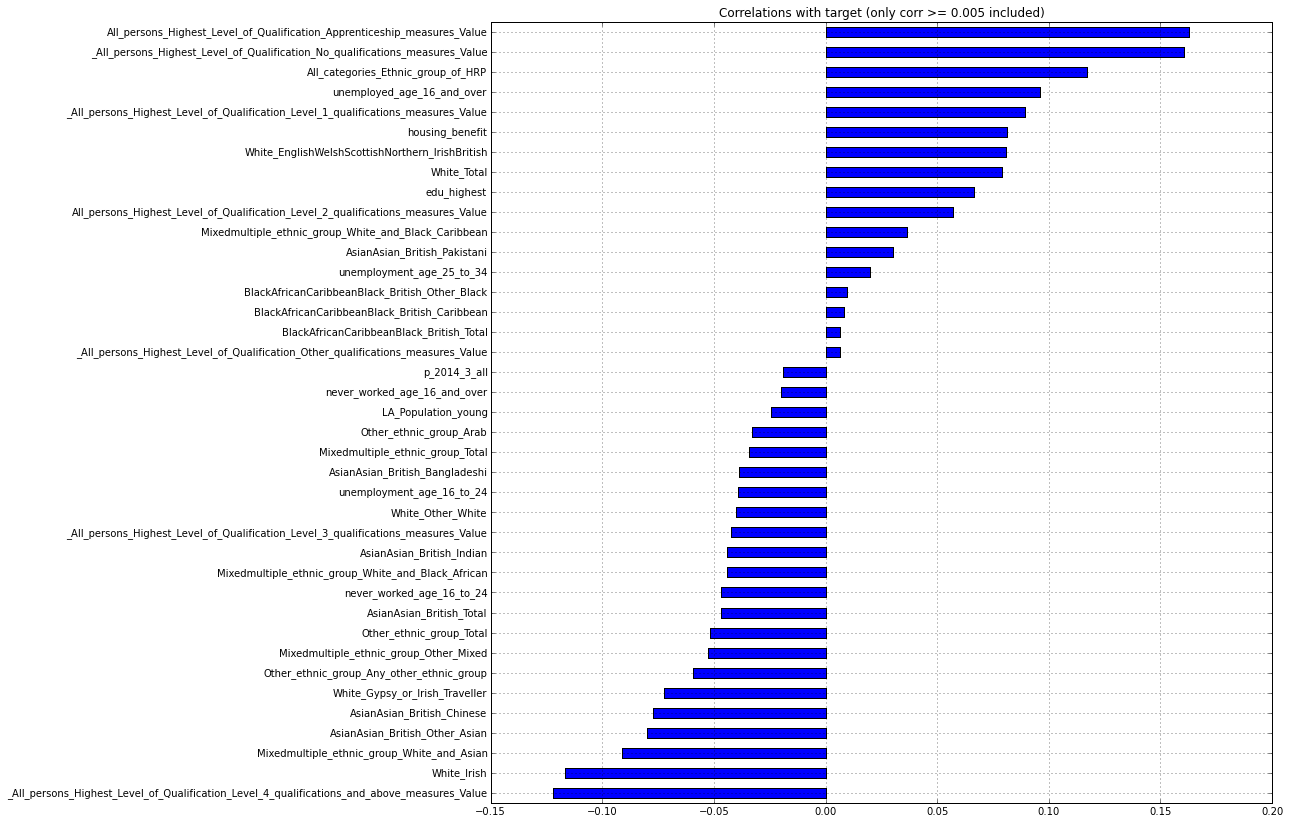

In [49]:
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = (14, 14)
correlation_with_target = train_filled[predictors + [TARGET_COLNAME]].corr()[TARGET_COLNAME].order()
correlation_with_target[ np.abs(correlation_with_target) > 0.005][:-1].plot(kind='barh', title='Correlations with target (only corr >= 0.005 included)')

### Individual relationships

In [50]:
from sklearn import linear_model
clf_ind = linear_model.LinearRegression()
plt.rcParams['figure.figsize'] = (10, 8)

#### Young population

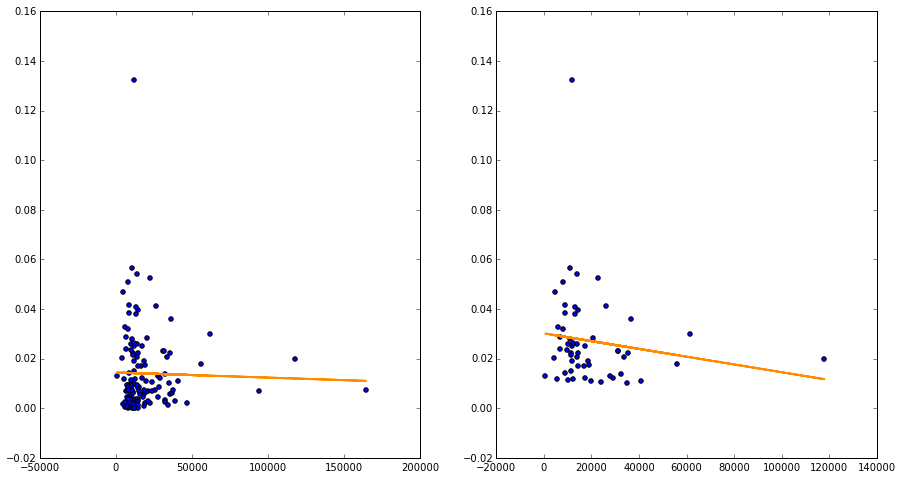

In [51]:
target_colname=TARGET_COLNAME
plt.rcParams['figure.figsize'] = (15, 8)

predictor = population_colname
clf_ind.fit(train_filled[[predictor]], train_filled[target_colname])
prediction = clf_ind.predict(train_filled[[predictor]])

fig = plt.figure()
ax = fig.add_subplot(121)
ax.scatter(train_filled[predictor], train_filled[target_colname])
ax.plot(train_filled[predictor], prediction, color='darkorange', lw=2)

mask = train_filled['Presented_Normalised'] > 0.01
clf_ind.fit(train_filled[mask][[predictor]], train_filled[mask][target_colname])
prediction = clf_ind.predict(train_filled[mask][[predictor]])
ax2 = fig.add_subplot(122)
ax2.scatter(train_filled[mask][predictor], train_filled[mask][target_colname])
ax2.plot(train_filled[mask][predictor], prediction, color='darkorange', lw=2)

/home/adam/anaconda3/lib/python3.4/site-packages/IPython/kernel/__main__.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':


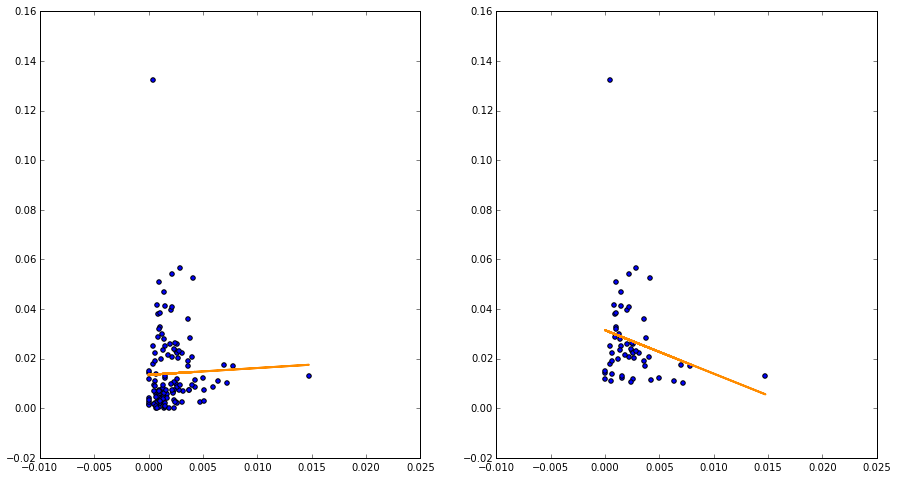

In [52]:
train_filled['p2014_normalised'] = train_filled['p_2014_3_all']/train_filled[population_colname]
predictor = 'p2014_normalised'

clf_ind.fit(train_filled[[predictor]], train_filled[target_colname])
prediction = clf_ind.predict(train_filled[[predictor]])

fig = plt.figure()
ax = fig.add_subplot(121)
ax.scatter(train_filled[predictor], train_filled[target_colname])
ax.plot(train_filled[predictor], prediction, color='darkorange', lw=2)

mask = train_filled['Presented_Normalised'] > 0.01
clf_ind.fit(train_filled[mask][[predictor]], train_filled[mask][target_colname])
prediction = clf_ind.predict(train_filled[mask][[predictor]])
ax2 = fig.add_subplot(122)
ax2.scatter(train_filled[mask][predictor], train_filled[mask][target_colname])
ax2.plot(train_filled[mask][predictor], prediction, color='darkorange', lw=2)

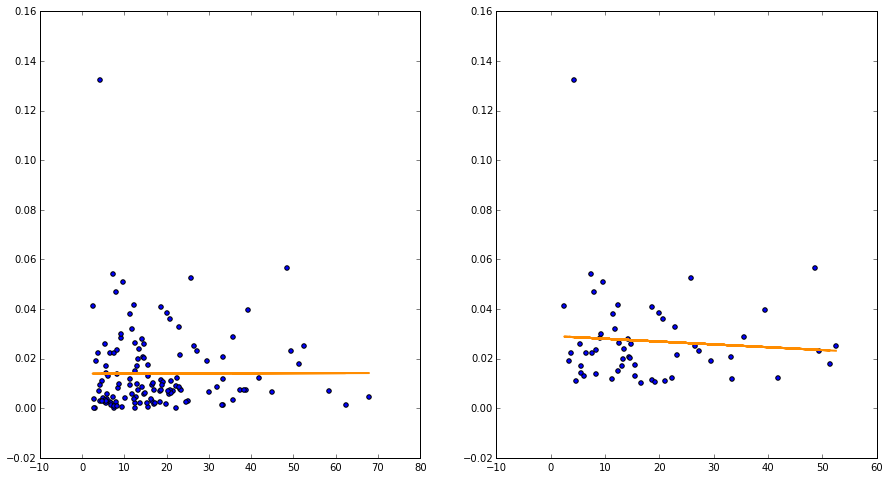

In [53]:
plt.rcParams['figure.figsize'] = (15, 8)

predictor = 'IMD_SCORE'
target_colname = 'Presented_Normalised'
clf_ind.fit(train_filled[[predictor]], train_filled[target_colname])
prediction = clf_ind.predict(train_filled[[predictor]])

fig = plt.figure()
ax = fig.add_subplot(121)
ax.scatter(train_filled[predictor], train_filled[target_colname])
ax.plot(train_filled[predictor], prediction, color='darkorange', lw=2)

mask = train_filled['Presented_Normalised'] > 0.01
clf_ind.fit(train_filled[mask][[predictor]], train_filled[mask][target_colname])
prediction = clf_ind.predict(train_filled[mask][[predictor]])
ax2 = fig.add_subplot(122)
ax2.scatter(train_filled[mask][predictor], train_filled[mask][target_colname])
ax2.plot(train_filled[mask][predictor], prediction, color='darkorange', lw=2)

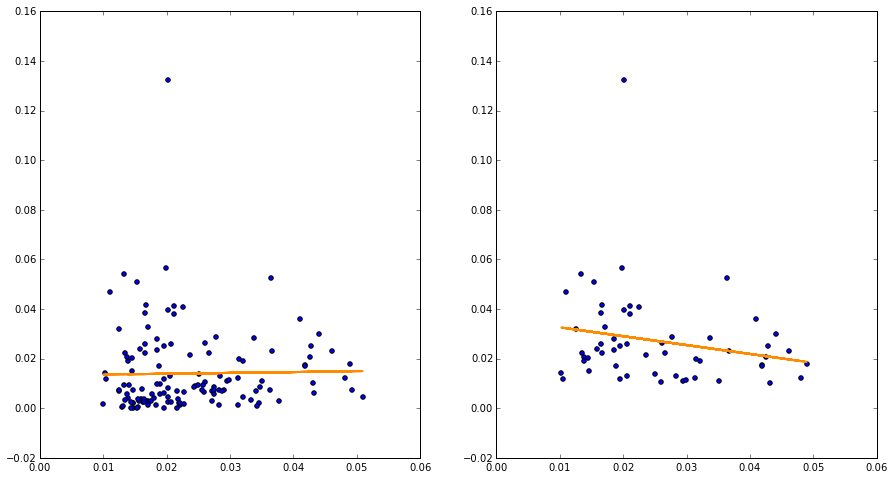

In [54]:
predictor = 'unemployment_age_25_to_34'
clf_ind.fit(train_filled[[predictor]], train_filled[target_colname])
prediction = clf_ind.predict(train_filled[[predictor]])

fig = plt.figure()
ax = fig.add_subplot(121)
ax.scatter(train_filled[predictor], train_filled[target_colname])
ax.plot(train_filled[predictor], prediction, color='darkorange', lw=2)

mask = train_filled['Presented_Normalised'] > 0.01
clf_ind.fit(train_filled[mask][[predictor]], train_filled[mask][target_colname])
prediction = clf_ind.predict(train_filled[mask][[predictor]])
ax2 = fig.add_subplot(122)
ax2.scatter(train_filled[mask][predictor], train_filled[mask][target_colname])
ax2.plot(train_filled[mask][predictor], prediction, color='darkorange', lw=2)

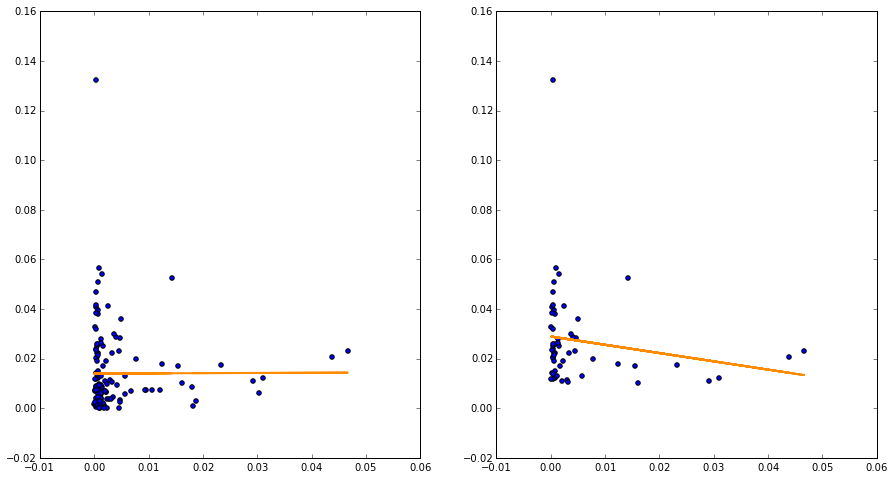

In [55]:
predictor = 'BlackAfricanCaribbeanBlack_British_African'
clf_ind.fit(train_filled[[predictor]], train_filled[target_colname])
prediction = clf_ind.predict(train_filled[[predictor]])

fig = plt.figure()
ax = fig.add_subplot(121)
ax.scatter(train_filled[predictor], train_filled[target_colname])
ax.plot(train_filled[predictor], prediction, color='darkorange', lw=2)

mask = train_filled['Presented_Normalised'] > 0.01
clf_ind.fit(train_filled[mask][[predictor]], train_filled[mask][target_colname])
prediction = clf_ind.predict(train_filled[mask][[predictor]])
ax2 = fig.add_subplot(122)
ax2.scatter(train_filled[mask][predictor], train_filled[mask][target_colname])
ax2.plot(train_filled[mask][predictor], prediction, color='darkorange', lw=2)

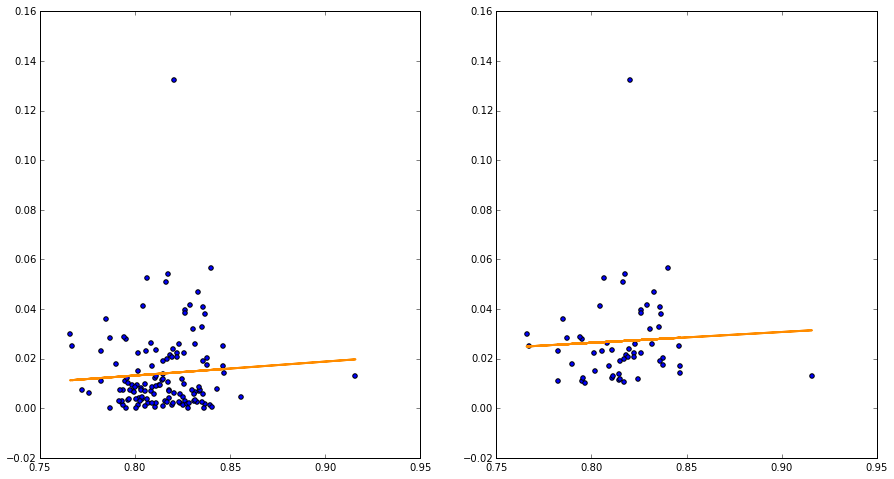

In [56]:
predictor = 'edu_highest'
clf_ind.fit(train_filled[[predictor]], train_filled[target_colname])
prediction = clf_ind.predict(train_filled[[predictor]])

fig = plt.figure()
ax = fig.add_subplot(121)
ax.scatter(train_filled[predictor], train_filled[target_colname])
ax.plot(train_filled[predictor], prediction, color='darkorange', lw=2)

mask = train_filled['Presented_Normalised'] > 0.01
clf_ind.fit(train_filled[mask][[predictor]], train_filled[mask][target_colname])
prediction = clf_ind.predict(train_filled[mask][[predictor]])
ax2 = fig.add_subplot(122)
ax2.scatter(train_filled[mask][predictor], train_filled[mask][target_colname])
ax2.plot(train_filled[mask][predictor], prediction, color='darkorange', lw=2)

### Linear Model

#### All data

In [57]:
picked_predictors = [population_colname, 'housing_benefit', 'p_2014_3_all', 'BlackAfricanCaribbeanBlack_British_African', 'unemployment_age_25_to_34', 'edu_highest', 'White_Total', 'IMD_SCORE']

In [58]:
import statsmodels.formula.api as sm
model1 = sm.ols(formula="{0} ~ {1}".format(TARGET_COLNAME, ' + '.join(picked_predictors)), data=train_filled).fit()
model1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                             OLS Regression Results                             
================================================================================
Dep. Variable:     Presented_Normalised   R-squared:                       0.028
Model:                              OLS   Adj. R-squared:                 -0.035
Method:                   Least Squares   F-statistic:                    0.4407
Date:                  Sat, 15 Aug 2015   Prob (F-statistic):              0.895
Time:                          08:24:03   Log-Likelihood:                 358.24
No. Observations:                   133   AIC:                            -698.5
Df Residuals:                       124   BIC:                            -672.5
Df Model:                             8                                         
Covariance Type:              nonrobust                                         
==============================================================================================================
                                                 coef    std err          t      P>|t|      [95.0% Conf. Int.]
--------------------------------------------------------------------------------------------------------------
Intercept                                     -0.0220      0.072     -0.305      0.761        -0.165     0.121
LA_Population_young                        -2.657e-08   1.27e-07     -0.210      0.834     -2.77e-07  2.24e-07
housing_benefit                                0.0766      0.145      0.528      0.598        -0.211     0.364
p_2014_3_all                                3.409e-06      3e-05      0.114      0.910     -5.59e-05  6.28e-05
BlackAfricanCaribbeanBlack_British_African     0.0926      0.355      0.261      0.795        -0.610     0.795
unemployment_age_25_to_34                      0.1600      0.421      0.380      0.704        -0.673     0.993
edu_highest                                    0.0040      0.107      0.037      0.970        -0.208     0.216
White_Total                                    0.0654      0.079      0.831      0.407        -0.090     0.221
IMD_SCORE                                  -9.701e-05      0.000     -0.684      0.495        -0.000     0.000
==============================================================================
Omnibus:                      124.780   Durbin-Watson:                   1.401
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             1895.232
Skew:                           3.249   Prob(JB):                         0.00
Kurtosis:                      20.314   Cond. No.                     8.60e+06
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 8.6e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

#### "Reliable" data

(take only those authorities for which the franction of presented is > 0.01)

In [61]:
mask = train_filled['Presented_Normalised'] > 0.01
import statsmodels.formula.api as sm
model2 = sm.ols(formula="{0} ~ {1}".format(TARGET_COLNAME, ' + '.join(picked_predictors)), data=train_filled[mask]).fit()
model2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                             OLS Regression Results                             
================================================================================
Dep. Variable:     Presented_Normalised   R-squared:                       0.070
Model:                              OLS   Adj. R-squared:                 -0.088
Method:                   Least Squares   F-statistic:                    0.4441
Date:                  Sat, 15 Aug 2015   Prob (F-statistic):              0.888
Time:                          08:25:07   Log-Likelihood:                 145.63
No. Observations:                    56   AIC:                            -273.3
Df Residuals:                        47   BIC:                            -255.0
Df Model:                             8                                         
Covariance Type:              nonrobust                                         
==============================================================================================================
                                                 coef    std err          t      P>|t|      [95.0% Conf. Int.]
--------------------------------------------------------------------------------------------------------------
Intercept                                      0.0663      0.121      0.549      0.586        -0.177     0.309
LA_Population_young                        -2.872e-08   1.86e-07     -0.154      0.878     -4.04e-07  3.46e-07
housing_benefit                                0.1483      0.233      0.637      0.527        -0.320     0.616
p_2014_3_all                               -6.975e-05   8.71e-05     -0.801      0.427        -0.000     0.000
BlackAfricanCaribbeanBlack_British_African    -0.0984      0.475     -0.207      0.837        -1.053     0.856
unemployment_age_25_to_34                     -0.4702      0.678     -0.694      0.491        -1.834     0.893
edu_highest                                   -0.0224      0.187     -0.120      0.905        -0.398     0.353
White_Total                                   -0.0365      0.137     -0.267      0.791        -0.312     0.239
IMD_SCORE                                   -8.11e-05      0.000     -0.325      0.747        -0.001     0.000
==============================================================================
Omnibus:                       67.335   Durbin-Watson:                   1.594
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              624.806
Skew:                           3.199   Prob(JB):                    2.11e-136
Kurtosis:                      18.061   Cond. No.                     7.29e+06
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 7.29e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

### Conclusion

As you can see from the plots, none of the variables that I've tried are really correlated, and I tried the most _correlated_ ones...